<div class='alert alert-info'>
    <h1 align="center">K-means Culstering</h1>
    <h3 align="center">Mo Rahdar</h3>
</div>

# Introduction

K-means clustering is a popular unsupervised learning algorithm used for partitioning a dataset into `k` distinct, non-overlapping clusters. It's widely used in various fields, including data mining, machine learning, and pattern recognition, for tasks such as customer segmentation, image compression, and anomaly detection.

We want to use sklearn library for this unsupervised learning algorithm.

In [19]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

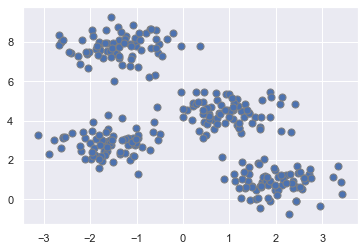

In [2]:
X, _ = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50, edgecolors='gray');

In [3]:
km = KMeans(n_clusters=4) # create a KMeans object
km.fit(X)                 # fit the model to the data

# predict the closest cluster each sample in X belongs to
y_pred = km.predict(X)

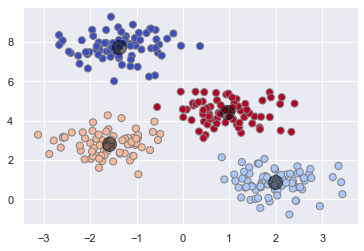

In [4]:
# create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50,
            edgecolors='gray', cmap=plt.cm.coolwarm)

# obtaine the centroid coordinates
centers = km.cluster_centers_

# plot the centroid coordinates
plt.scatter(centers[:, 0], centers[:, 1], c='black',  s=200, alpha=0.5);

The procedure we had in file 16 is guaranteed to improve the result in each step, but there is no assurance that it will lead to the global best solution. For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results.

The approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed `Scikit-Learn` does by default (set by the `n_init` parameter, which defaults to 10).

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters.

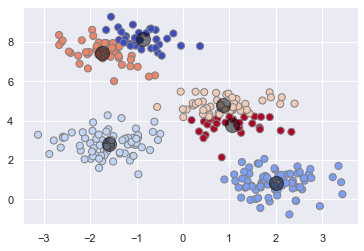

In [9]:
km = KMeans(6).fit(X)          # initiate Kmeans model and fit the data
y_pred = km.predict(X)         # predict cluster lables
centers = km.cluster_centers_  # get cluster centroids

plt.scatter(X[:, 0], X[:, 1], c=y_pred,
            s=50, edgecolors='gray', cmap=plt.cm.coolwarm)

plt.scatter(centers[:, 0], centers[:, 1],
            c='black', s=200, alpha=0.5);

# Silhouette Analysis

Silhouette Analysis is a technique used to evaluate the quality of clusters created by clustering algorithms such as k-means. It provides a way to measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

The silhouette score ranges from -1 to 1, where:

- A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the object is poorly matched to its own cluster and well matched to neighboring clusters.

The silhouette score is calculated for each sample in the dataset and then averaged to obtain an overall score for the clustering. Higher silhouette scores indicate better-defined clusters.

## Find the optimal number of clusters

Silhouette Analysis helps in selecting the optimal number of clusters for a dataset by comparing the silhouette scores for different numbers of clusters. The number of clusters that maximizes the silhouette score is considered the most appropriate number of clusters for the dataset.

The steps for performing Silhouette Analysis typically include:
1. Run a clustering algorithm (e.g., k-means) with different numbers of clusters.
2. For each clustering result, calculate the silhouette score for each sample.
3. Compute the average silhouette score for each clustering result.
4. Choose the number of clusters that maximizes the average silhouette score.

By using Silhouette Analysis, you can quantitatively assess the quality of clustering and make informed decisions about the number of clusters to use in your dataset.

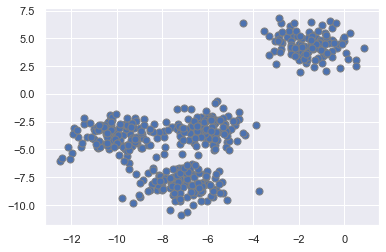

In [22]:
X, _ = make_blobs(n_samples=500, centers=4,
                  cluster_std=1, random_state=1)

plt.scatter(X[:, 0], X[:, 1], s=50, edgecolors='gray');

## Perform silhouette analysis for KMeans clustering for various k

To interpret the silhouette plot and determine the optimal number of clusters (k), follow these steps:

1. **Silhouette Coefficient**
   - The silhouette coefficient measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1.
   - A high silhouette coefficient indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 1 suggests that the object is appropriately assigned to its cluster.
   - A negative silhouette coefficient suggests that the object might be assigned to the wrong cluster.
   - The average silhouette coefficient across all objects in the dataset gives an overall measure of how well the clustering has been performed.
   
2. **Silhouette Plot**
   - The silhouette plot provides a graphical representation of the silhouette coefficients for each data point.
   - Each data point is represented by a horizontal line segment, with the length indicating the silhouette coefficient.
   - The silhouette plot is sorted by cluster label, with labels shown on the y-axis. The width of each segment represents the size of the cluster.
   - The dashed vertical line represents the average silhouette coefficient across all data points.
   - Ideally, you want to see most of the lines (silhouette coefficients) above the dashed line, indicating that the clusters are well-separated and appropriately assigned.
   
3. **Interpretation**
   - Look for clusters with a high average silhouette coefficient compared to others. These clusters are well-separated from other clusters and internally cohesive.
   - If there are clusters with low or negative silhouette coefficients, it suggests that the data points in those clusters might be misclassified or poorly separated from neighboring clusters.
   - Choose the number of clusters (k) that maximizes the average silhouette coefficient while ensuring that most individual silhouette coefficients are above the dashed line.
   
4. **Selection of k**
   - The optimal number of clusters (k) is where the average silhouette coefficient is highest or where it levels off, suggesting diminishing returns from adding more clusters.
   - However, it's essential to balance this with domain knowledge and context. Sometimes, even if the silhouette plot suggests a certain k, it might not make sense from a practical standpoint.

For n_clusters = 2 The average silhouette_score is: 0.7049787496083262
For n_clusters = 3 The average silhouette_score is: 0.5882004012129721
For n_clusters = 4 The average silhouette_score is: 0.6505186632729437
For n_clusters = 5 The average silhouette_score is: 0.56376469026194
For n_clusters = 6 The average silhouette_score is: 0.4504666294372765


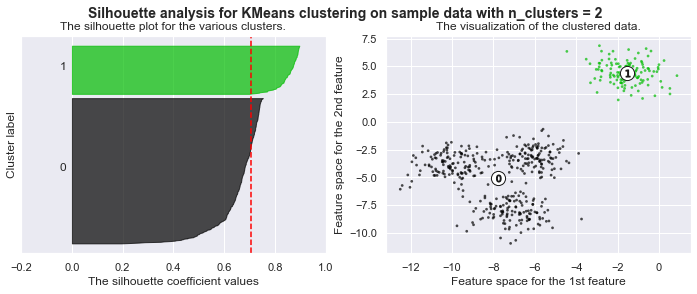

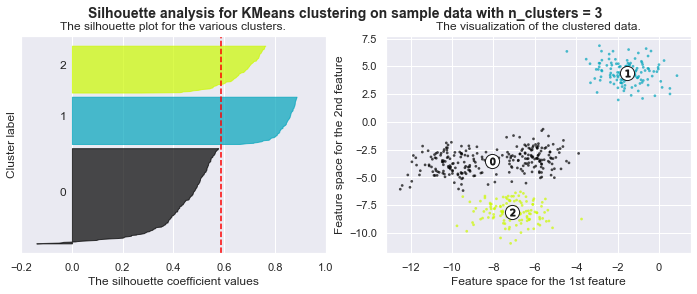

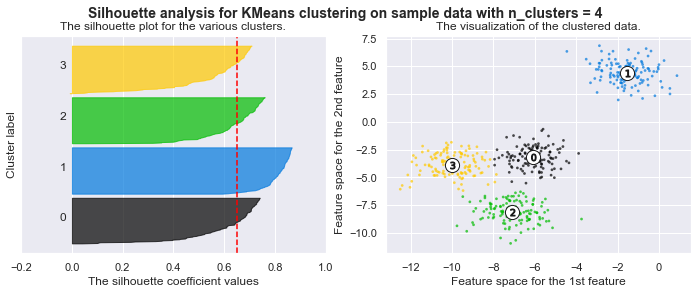

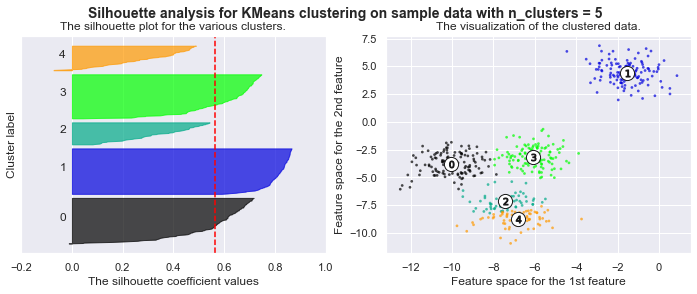

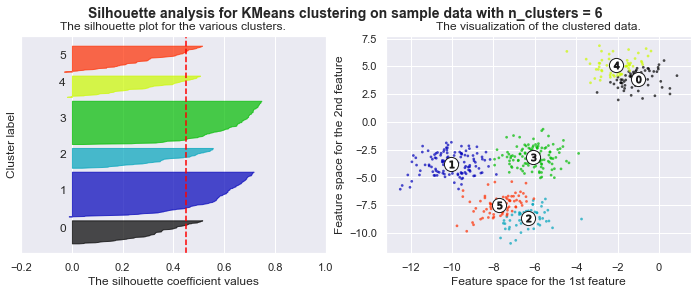

In [29]:
# define the range of cluster numbers to iterate over
range_n_clusters = [2, 3, 4, 5, 6]

# iterate over each cluster number
for k in range_n_clusters:
    
    # create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    # initialize a KMeans clusterer with the current number of clusters.
    clusterer = KMeans(n_clusters=k, random_state=10)
    
    # fit the clusterer to the data and predict cluster labels
    cluster_labels = clusterer.fit_predict(X)

    # compute the average silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # print the average silhouette score
    print('For n_clusters =', k,
          'The average silhouette_score is:', silhouette_avg)

    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # initialize y_lower for plotting the silhouette plots
    y_lower = 10
    
    # iterate over each cluster
    for i in range(k):
        
        # select silhouette scores for the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # sort silhouette scores for the current cluster
        ith_cluster_silhouette_values.sort()

        # compute the size of the current cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        # compute y_upper for plotting the silhouette plots
        y_upper = y_lower + size_cluster_i

        # select color for the current cluster
        color = cm.nipy_spectral(float(i) / k)
        
        # fill the silhouette plot for the current cluster
        ax1.fill_betweenx(y=np.arange(y_lower, y_upper),
                          x1=0, x2=ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10

    # set title and labels in the silhouette plot
    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    # set the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # set xaxis ticks and clear the yaxis ticks
    ax1.set_xticks([-.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_yticks([])

    # plot the actual clusters in the 2nd subplot
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30,
                lw=0, alpha=0.7, c=colors, edgecolor='k')

    # plot cluster centers as white circles
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o",
                c='white', alpha=1, s=200, edgecolor='k')

    # label the cluster centers with their cluster numbers
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')

    # set title and labels for the 2nd subplot
    ax2.set_title('The visualization of the clustered data.')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')

    # set the main title for the entire figure
    plt.suptitle(
        'Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'
        % k, fontsize=14, fontweight='bold')
    
plt.show()

The silhouette plot shows that the k value of 3, 5, and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots.

The cluster size can be visualized from the thickness of the silhouette plot. When k is 2, the silhouette plot for cluster 0 is bigger in size, indicating that this cluster is large. However when k is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right. When k=4, we see that the blue cluster have better silhouettes than the other three. It’s because their points are better separated than the points of the other three clusters.

I would select k=4 as the best number of clusters for this example.

# Nonlinearly Separable Clusters

Nonlinearly separable clusters refer to clusters in a dataset that cannot be effectively separated by linear decision boundaries. In other words, the clusters exhibit complex shapes or structures that cannot be adequately captured by straight lines or hyperplanes.

K-means clustering, being a partitioning algorithm, assumes that clusters are spherical and have similar sizes and densities. It works by minimizing the within-cluster sum of squares, which often results in clusters with convex shapes. As a result, k-means may struggle to effectively capture nonlinearly separable clusters, as it is limited by its assumption of spherical clusters and may fail to find appropriate cluster boundaries for complex shapes.

Other clustering algorithms such as Spectral Clustering are more suitable for handling nonlinearly separable clusters. Spectral clustering works by transforming the data into a higher-dimensional space using spectral embedding and then clustering the transformed data. It is capable of capturing complex nonlinear structures in the data and can identify clusters with arbitrary shapes.

In [20]:
# create two interleaving half circles
X, _ = make_moons(200, noise=.05, random_state=0)

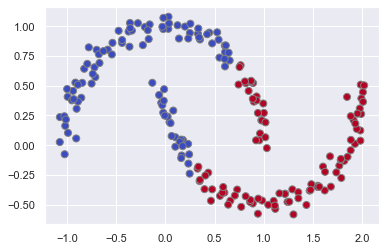

In [21]:
# initiate Kmeans model, fit the data, and predict the cluster lables
labels = KMeans(2, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50,
            edgecolors='gray', cmap=plt.cm.coolwarm);

As you see, K-means clustering is not suitable for such datasets with complex shapes. This situation is like the discussion in Support Vector Machines, where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in `Scikit-Learn` within the `SpectralClustering` estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

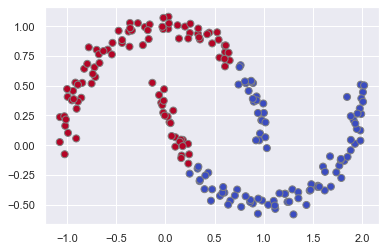

In [18]:
# initialize Spectral Clustering
# it uses the rbf affinity to construct the affinity matrix
# it uses k-means clustering to assign final cluster labels
clf = SpectralClustering(n_clusters=2, affinity='rbf',
                         assign_labels='kmeans')

# fit the data and predict the clustering lables
labels = clf.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50,
            edgecolors='gray', cmap=plt.cm.coolwarm);